### Import libraries to deal with arrays, data frames, and plots

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import customer id and week by using provided "Active users" excel file
#### Please feed the file that i attched in zip file (I converted .xls file format into .xlsx file)

In [33]:
# Import the Excel file into a DataFrame
data = pd.read_excel("C:/Users/Zoom/Desktop/Active_Users.xlsx", header=0)
df = pd.DataFrame(data)
print(df)

                    w1                w2                w3                w4  \
0     fd7c28f9fd8045f2  fd7c28f9fd8045f2  fd7c28f9fd8045f2  fd7c28f9fd8045f2   
1     54910d2b363221e1  520443b0b8128202  a4bce0d054266d68  a4bce0d054266d68   
2     520443b0b8128202  a4bce0d054266d68  7b042fcc54a45882  d98da6eaa4bb452f   
3     a4bce0d054266d68  d1afc6d7c4661d7e  aed9597fc6984d64  7b042fcc54a45882   
4     3792a1c9395e3e2a  7b042fcc54a45882  407d67f50877e6f9  aed9597fc6984d64   
...                ...               ...               ...               ...   
4009               NaN               NaN               NaN               NaN   
4010               NaN               NaN               NaN               NaN   
4011               NaN               NaN               NaN               NaN   
4012               NaN               NaN               NaN               NaN   
4013               NaN               NaN               NaN               NaN   

                    w5                w

### Observation
&rightarrow; Same number of rows with customer id's are not present for all the 56 weeks. 

&rightarrow; NAN values are actually the empty cells in excel, and the provided datas are customer ids, so no missing value treatment is required.

&rightarrow; Datas are customer id's so no outlier treatments are required. 

### Calculation of New users cunt, Churned users count, Resurrected users counts, and quick ratios for all possible weeks.

In [30]:
# Initialize lists to store the counts for each week
new_users_counts = []
churned_users_counts = []
resurrected_users_counts = []
quick_ratios = []

# Loop through each week
for i in range(1, 56):
    # Convert the columns to sets for easier comparison
    set_w_current = set(df[f'w{i}'])
    set_w_next = set(df[f'w{i+1}'])
    
    # Calculate new, resurrected, and churned users
    new_users = set_w_next - set_w_current
    churned_users = set_w_current - set_w_next
    resurrected_users = set_w_current & set_w_next  # Users who appear in both weeks
    
    # Store the counts
    new_users_counts.append(len(new_users))
    churned_users_counts.append(len(churned_users))
    resurrected_users_counts.append(len(resurrected_users))

# Calculate Quick Ratio
    if len(churned_users) > 0:
        quick_ratio = (len(new_users) + len(resurrected_users)) / len(churned_users)
    else:
        quick_ratio = float('inf')  # Handle division by zero by assigning infinity
    quick_ratios.append(quick_ratio)

# Create a dataframe with the results
results_df = pd.DataFrame({
    'Week': [f'Week {i+1}' for i in range(1, 56)],
    'New Users': new_users_counts,
    'Churned Users': churned_users_counts,
    'Resurrected Users': resurrected_users_counts,
    'Quick Ratio': quick_ratios
})

# Print the results
print("Users statistics per week:\n", results_df)

Users statistics per week:
        Week  New Users  Churned Users  Resurrected Users  Quick Ratio
0    Week 2        723            828                932     1.998792
1    Week 3        732            654               1001     2.649847
2    Week 4        947            563               1170     3.760213
3    Week 5        799            722               1395     3.038781
4    Week 6        676            714               1480     3.019608
5    Week 7       1062            668               1488     3.817365
6    Week 8       1198            872               1678     3.298165
7    Week 9        956           1036               1840     2.698842
8   Week 10        883            857               1939     3.292882
9   Week 11        815            890               1932     3.086517
10  Week 12        962            802               1945     3.624688
11  Week 13       1059            885               2022     3.481356
12  Week 14        960            989               2092     3

### Weekly (WAU) Growth Accounting charts

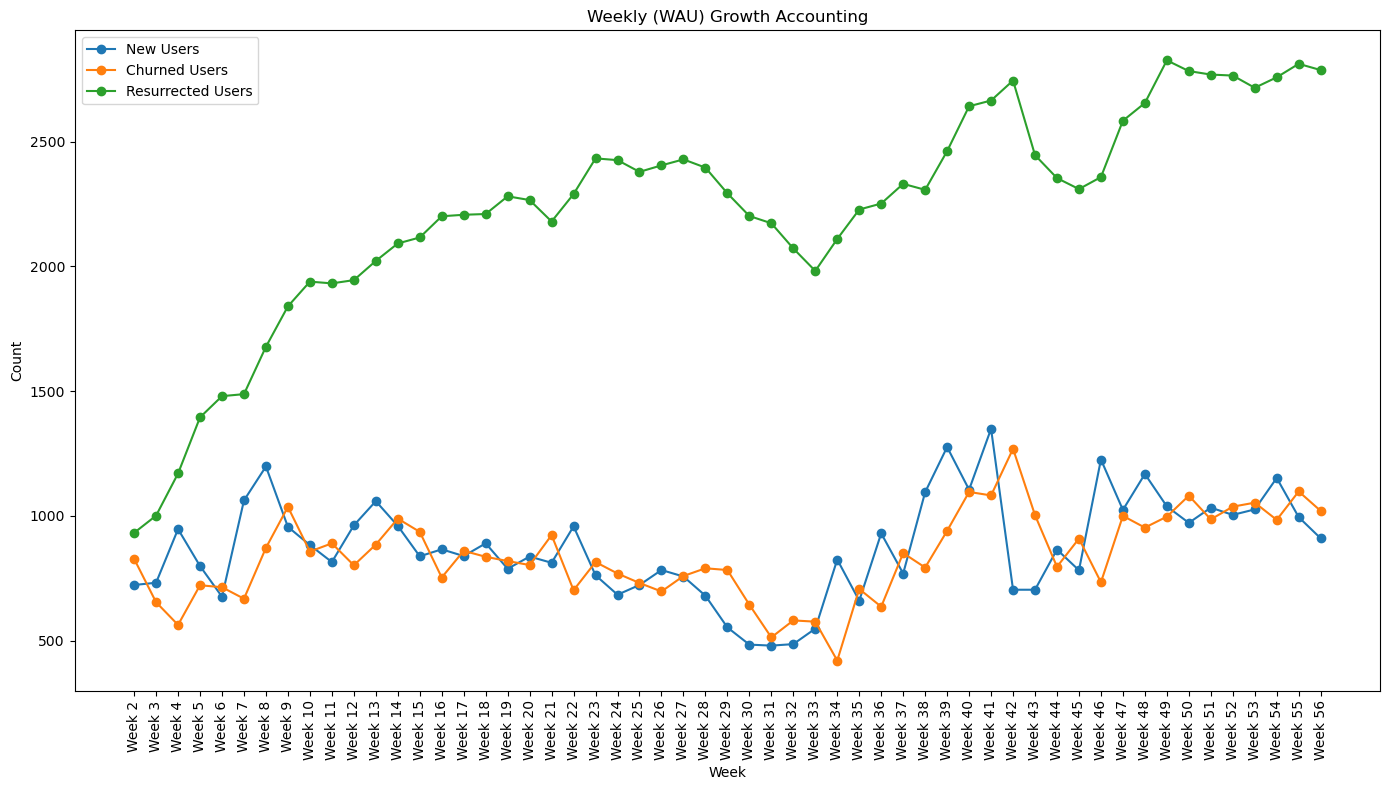

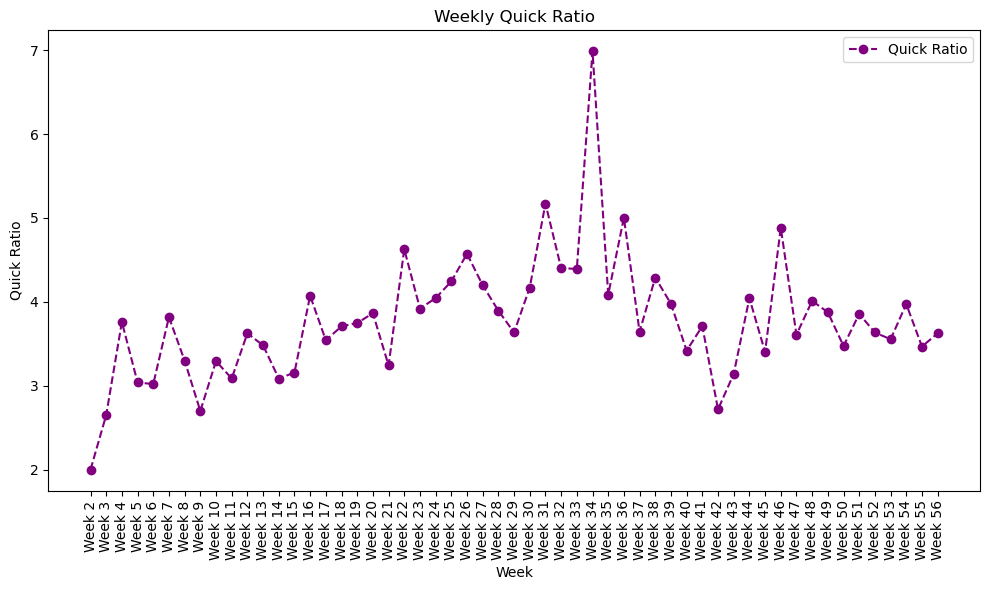


Insights for the final week:
Number of New Users: 910
Number of Resurrected Users: 2787
Number of Churned Users: 1020
Quick Ratio: 3.62

The user base is growing well, as the quick ratio is greater than 1.


In [31]:
# Create a summary DataFrame for all weeks
summary_df = pd.DataFrame({
    'Week': [f'Week {i+1}' for i in range(1, 56)],
    'New Users': new_users_counts,
    'Churned Users': churned_users_counts,
    'Resurrected Users': resurrected_users_counts,
    'Quick Ratio': quick_ratios
})

# Visualize the data for "New Users", "Churned Users", and "Resurrected Users".
plt.figure(figsize=(14, 8))
plt.plot(summary_df['Week'], summary_df['New Users'], label='New Users', marker='o')
plt.plot(summary_df['Week'], summary_df['Churned Users'], label='Churned Users', marker='o')
plt.plot(summary_df['Week'], summary_df['Resurrected Users'], label='Resurrected Users', marker='o')

# Variation charts and comparision for "New Users", "Churned Users", and "Resurrected Users".
plt.title('Weekly (WAU) Growth Accounting')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize the Quick Ratio.
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Week'], summary_df['Quick Ratio'], label='Quick Ratio', marker='o', linestyle='--', color='purple')

# Variation charts for "Quick ratio".
plt.title('Weekly Quick Ratio')
plt.xlabel('Week')
plt.ylabel('Quick Ratio')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# print for the insight for the final week
print("\nInsights for the final week:")
print(f"Number of New Users: {new_users_counts[-1]}")
print(f"Number of Resurrected Users: {resurrected_users_counts[-1]}")
print(f"Number of Churned Users: {churned_users_counts[-1]}")
print(f"Quick Ratio: {quick_ratios[-1]:.2f}\n")

if quick_ratios[-1] > 1:
    print("\033[1mThe user base is growing well, as the quick ratio is greater than 1.\033[0m")
else:
    print("\033[1mThe user base is shrinking, as the quick ratio is less than 1.\033[0m")